In [1]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
# Import and read the cvs file.
import pandas as pd 
medal_info = pd.read_csv("Resources/Regression Data.csv")
medal_info.head()

,NOC,Year,GDP,Population,Medals
0,USA,1960,5.430000e+11,180700000,34
1,USA,1964,6.860000e+11,191900000,38
2,USA,1968,9.430000e+11,200700000,45
3,USA,1972,1.280000e+12,209900000,48
4,USA,1976,1.870000e+12,218000000,49


In [3]:
# Setting up the independent variable and dependent variable
X = pd.get_dummies(medal_info[['NOC']])
X['GDP'] = medal_info['GDP']
X['Population'] = medal_info['Population']
y = medal_info['Medals']

In [4]:
# Setting up the model training and testing group
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=2)

In [5]:
# Normalizing the variables
scaler = MinMaxScaler()
cols_to_norm = ['GDP','Population']
X_train[cols_to_norm] = scaler.fit_transform(X_train[cols_to_norm])
X_test[cols_to_norm] = scaler.transform(X_test[cols_to_norm])

C:\Users\Doris\anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\Doris\anaconda3\envs\mlenv\lib\site-packages\pandas\core\indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
C:\Users\Doris\anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a 

In [6]:
reg = linear_model.LinearRegression()
reg.fit(medal_info[['GDP','Population']], medal_info.Medals)

LinearRegression()

In [7]:
# Generating the coefficients for the regression
reg.coef_

array([1.91822104e-12, 1.01431335e-08])

In [8]:
# Generating the intercept for the regression
reg.intercept_

8.534067417575553

In [9]:
# Making a prediction
reg.predict([[5930000000000,800000000]])

array([28.02362499])

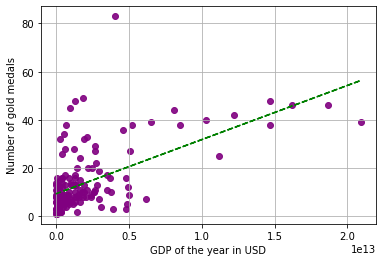

In [10]:
# Ploting the relationship between number of medals gold won and GDP of the country
plt.scatter(medal_info.GDP, medal_info.Medals, c="purple", alpha=0.9)
plt.xlabel("GDP of the year in USD")
plt.ylabel("Number of gold medals")
plt.grid(True)
z = np.polyfit(medal_info.GDP, medal_info.Medals, 1)
p = np.poly1d(z)
plt.plot(medal_info.GDP, p(medal_info.GDP), "g--")
plt.show()

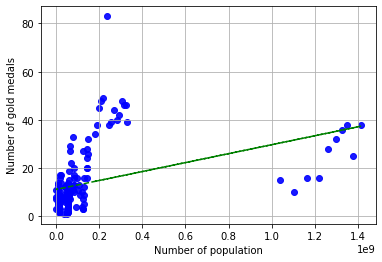

In [11]:
#Ploting the relationship between number of medals won and populationship of the country
plt.scatter(medal_info.Population, medal_info.Medals, c='blue', alpha=0.9)
plt.xlabel("Number of population")
plt.ylabel("Number of gold medals")
plt.grid(True)
z = np.polyfit(medal_info.Population, medal_info.Medals, 1)
p = np.poly1d(z)
plt.plot(medal_info.Population, p(medal_info.Population), "g--")
plt.show()

In [12]:
# Calculating the accuracy rate of the model
reg.fit(X_train, y_train)
print(reg.score(X_train, y_train))
print(reg.score(X_test, y_test))

0.8397421128199004
0.6834017174397778
